# <b>Задание I «Поиск ассоциативных правил»</b>

Сделал: Хаялиев Раниль ИУ6-44Б, 7 вариант (23u660)

## Условие 1:
Загрузите файл «assc_TRANSACTION.csv». 

В нем три колонки:
<b>
- Customer – ID клиента,
- Product –покупка,
-  Time – временная метка (для задания не нужна).
</b>

Определите (написав соответствующий код) сколько различных значений принимают переменные Product и Customer


In [1]:
# Подключаем библиотеки
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from varclushi import VarClusHi

In [2]:
transactions = pd.read_csv("TRANSACTION.csv")
CUST = "CUSTOMER"
PROD = "PRODUCT"
transactions

,CUSTOMER,TIME,PRODUCT
0,0,0,hering
1,0,1,corned_b
2,0,2,olives
3,0,3,ham
4,0,4,turkey
...,...,...,...
7002,1000,2,apples
7003,1000,3,olives
7004,1000,4,steak
7005,1000,5,bourbon


In [3]:
# определим уникальное значения каждого столбца

def unique_value_of_column(column_name):
    if (column_name is transactions.columns):
        raise Exception 
    return transactions[column_name].value_counts().index.values.tolist()

try:
    unique_value_of_customer = unique_value_of_column(CUST)
    unique_value_of_product = unique_value_of_column(PROD)
    unique_value_of_customer.sort()
    unique_value_of_product.sort()
    print(f"В стобце {CUST} есть такие уникальные значения: {unique_value_of_customer}")
    print(f"В стобце {PROD} есть такие уникальные значения: {unique_value_of_product}")
except Exception as e:
    print(f"Столбца {e} не существует")

В стобце CUSTOMER есть такие уникальные значения: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

In [4]:
# Узнаем количество уникальных значений
print(f"В столбце {CUST} уникальных {len(unique_value_of_customer)} значений")
print(f"В столбце {PROD} уникальных {len(unique_value_of_product)} значений")

В столбце CUSTOMER уникальных 1001 значений
В столбце PRODUCT уникальных 20 значений


## Условие 2
Найдите частые эпизоды с ограничением на размер правила равным 4, с использованием
алгоритма и порога на поддержку согласно вашему варианту.

In [5]:
# преобразуем данные в one hot encoding относительно столбца PRODUCT 
one_hot = pd.get_dummies(transactions[PROD])
transactions_one_hot = transactions[[CUST]].join(one_hot)
transactions_one_hot = transactions_one_hot.groupby(CUST).sum().applymap(lambda x: 1 if x > 0 else 0)
transactions_one_hot

/tmp/ipykernel_4632/2834460093.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions_one_hot = transactions_one_hot.groupby(CUST).sum().applymap(lambda x: 1 if x > 0 else 0)


,apples,artichok,avocado,baguette,bordeaux,bourbon,chicken,coke,corned_b,cracker,ham,heineken,hering,ice_crea,olives,peppers,sardines,soda,steak,turkey
CUSTOMER,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0
997,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1
998,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0


In [6]:
# теперь применим модель apriori
frequent_itemsets = apriori(transactions_one_hot, min_support= 0.05, max_len= 4)
frequent_itemsets

/home/ranil/anaconda3/envs/math/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.313686,(0)
1,0.304695,(1)
2,0.362637,(2)
3,0.391608,(3)
4,0.073926,(4)
...,...,...
355,0.108891,"(8, 18, 12, 14)"
356,0.111888,"(8, 19, 12, 14)"
357,0.136863,"(9, 11, 12, 17)"
358,0.121878,"(9, 11, 14, 17)"


## Условие 3
Найдите самый большой (где больше всего элементов) частый эпизод, содержащий продукт
согласно вашему варианту. Какая у него поддержка?

In [7]:
PRODUCT_NAME = "ice_crea"

# находим нужных customer-в уоторые покуупали необходимый продукт PRODUCT NAME
index_of_ice_crea = transactions_one_hot.columns.values.tolist().index(PRODUCT_NAME)
itemsets_with_COLUMN_NAME = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x : index_of_ice_crea in x)]

# выбираем из ниходим из них itemsets в которых больше всего элементов 
COUNT_EL = 4
condition = itemsets_with_COLUMN_NAME["itemsets"].apply(lambda x: True if len(x) == COUNT_EL else False)
itemsets_with_COLUMN_NAME = itemsets_with_COLUMN_NAME[condition]

# а теперь выбираем itemsets в котором максимальный support
max_supports = itemsets_with_COLUMN_NAME['support'].max()
condition2 = itemsets_with_COLUMN_NAME['support'] == max_supports

answer = itemsets_with_COLUMN_NAME[condition2].iloc[0]
print(f"Самый частый эпизод {list(map(int, answer['itemsets']))} с поддержкой {answer["support"]}")
# itemsets_with_COLUMN_NAME

Самый частый эпизод [16, 11, 13, 7] с поддержкой 0.11688311688311688


## Усорвие 4

На основе найденных частых эпизодов постройте ассоциативные правила с порогом на
достоверность согласно вашему варианту. Найдите правило с максимальным лифтом,
содержащем продукт из вашего варианта в левой части правила. Дайте ему письменную
словесную интерпретацию, укажите и объясните его числовые показатели: поддержку,
достоверность и подъем.

In [8]:
itemsets_with_COLUMN_NAME
rules = association_rules(frequent_itemsets, metric= "confidence", min_threshold= 0.4)
condition3 = rules['antecedents'].apply(lambda x : index_of_ice_crea in x)
max_lift = rules[condition3]["lift"].max()
result = rules[(rules['lift'] == max_lift) & condition3]
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
822,"(13, 6)","(16, 7)",0.13986,0.146853,0.115884,0.828571,5.642177,1.0,0.095345,4.97669,0.956546,0.678363,0.799063,0.808844


In [9]:
temp_list = transactions_one_hot.columns.values
print(f"Сочетания продуктов, которые удовлетворняют нашим условиям: {temp_list[13]}, {temp_list[6]}, {temp_list[16]}, {temp_list[7]}")

Сочетания продуктов, которые удовлетворняют нашим условиям: ice_crea, chicken, sardines, coke


Давайте проведем анализ на основе полученного результата:

### Ассоциативное правило
Найденное ассоциативное правило выглядит следующим образом:
```
{ice_crea, chicken} -> {sardines, coke}
```

### Числовые показатели

1. Поддержка (Support): 0.115884
2. Достоверность (Confidence): 0.828571
3. Подъем (Lift): 5.642177

### Интерпретация

1. Поддержка (Support): Поддержка правила равна 0.115884. Это означает, что около 11.59% всех транзакций содержат как продукт `ice_crea`, `chicken` так и продукт  `coke`, `sardines`.

2. Достоверность (Confidence): Достоверность правила равна 0.828571. Это означает, что в 82.86% случаев, когда покупают продукт `ice_crea`, `chicken` также покупают продукт `coke`, `sardines`.

3. Подъем (Lift): Подъем правила равен 5.642177. Это означает, что покупка продукта `ice_crea`, `chicken` увеличивает вероятность покупки продукта `coke`, `sardines` в 5.64 раза по сравнению с общей вероятностью покупки продукта `coke`, `sardines`.

### Заключение
Правило `{ice_crea, chicken} -> {coke, sardines}` имеет высокую поддержку, достоверность и подъем. Это означает, что данное правило встречается достаточно часто в наборе данных, и покупка продукта `ice_crea`, `chicken` значительно увеличивает вероятность покупки продукта `coke`, `sardines`. Такое правило может быть полезным для маркетинговых стратегий, например, для рекомендаций продуктов.

## Условие 5

Используя только двухместные правила постройте ориентированный граф, где вершины
элементы правила, их цвет (или размер) – поддержка элемента (item support), дуги –
импликации (ориентированы в направлении от условия к следствию), веса дугu –
достоверности.


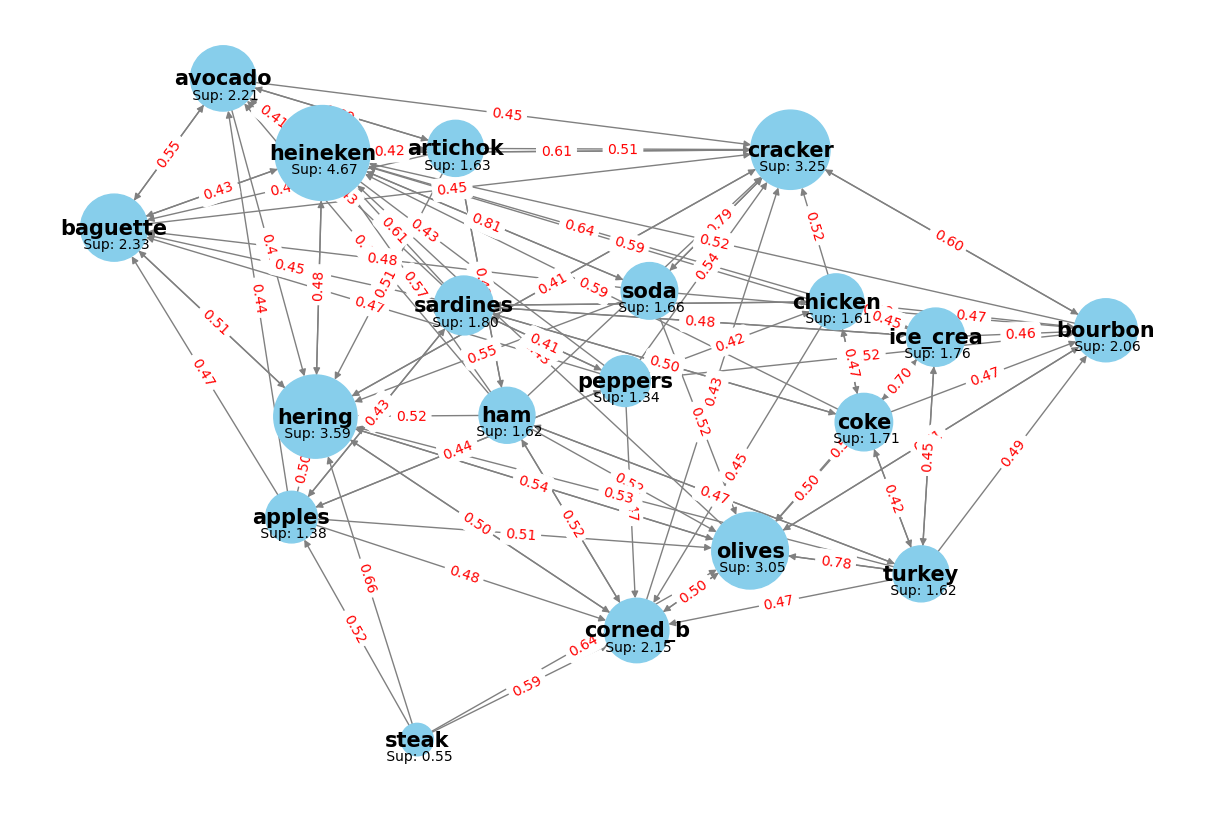

In [10]:
graph = nx.DiGraph()
columns = ['antecedents',"consequents", "support", "confidence"]
data = rules[(rules['antecedents'].apply(lambda x : len(x)) == 1) & (rules['consequents'].apply(lambda x : len(x)) == 1)][columns]

edges = [(list(row['antecedents'])[0], list(row['consequents'])[0], row['confidence']) for index, row in data.iterrows()]
edges_named = [(temp_list[edge[0]], temp_list[edge[1]], edge[2]) for edge in edges]
graph.add_weighted_edges_from(edges_named)

support_values = {}
for index, row in data.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    support = row['support']
    
    if temp_list[antecedent] not in support_values:
        support_values[temp_list[antecedent]] = 0
    if temp_list[consequent] not in support_values:
        support_values[temp_list[consequent]] = 0
        
    support_values[temp_list[antecedent]] += support
    support_values[temp_list[consequent]] += support

node_sizes = [support_values[node] * 1000 for node in graph.nodes]

pos = nx.spring_layout(graph)

plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=True, node_size=node_sizes, node_color="skyblue", font_size=15, font_color="black", font_weight="bold", edge_color="gray")
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in graph.edges(data=True)}, font_color='red')
nx.draw_networkx_labels(graph, pos, labels={node: f"\n\n Sup: {support_values[node]:.2f}" for node in graph.nodes}, font_size=10, font_color="black")
plt.show()

## Условие 6

Для данного графа рассчитайте меры центральности согласно вашему варианту и найдите
элемент с самой высокой мерой, а также какую меру имеет продукт из вашего варианта.

Элемент с самой высокой центральностью ('heineken', 0.782608695652174)
Мера моего продукта(ice_crea) 0.391304347826087
Меры центральности:


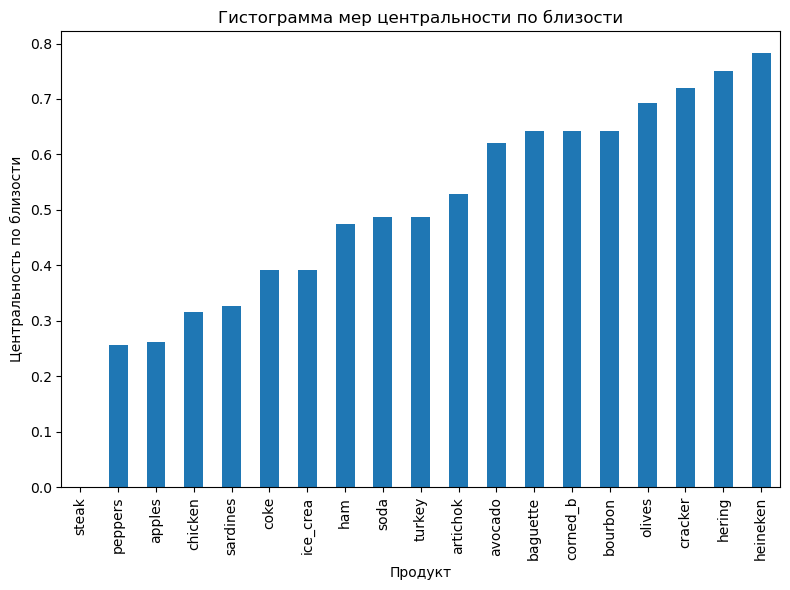

,closeness_centrality
product,
steak,0.000000
peppers,0.257143
apples,0.260870
chicken,0.315789
sardines,0.327273
coke,0.391304
ice_crea,0.391304
ham,0.473684
soda,0.486486


In [11]:
# счиатем меру центральности
closeness_centrality = nx.closeness_centrality(graph)
max_closeness_node = max(closeness_centrality.items(), key= lambda x: x[1])
print(f"Элемент с самой высокой центральностью {max_closeness_node}")
print(f"Мера моего продукта({PRODUCT_NAME}) {closeness_centrality[PRODUCT_NAME]}")
print("Меры центральности:")
sorted_closeness_centrality = sorted(closeness_centrality.items(), key= lambda x: x[1])
df = pd.DataFrame(sorted_closeness_centrality)
df.set_index(0, inplace= True)
df.index.name = 'product'
df = df.rename(columns= {1:'closeness_centrality'})
plt.figure(figsize=(8, 6))
df['closeness_centrality'].plot(kind='bar')
plt.title('Гистограмма мер центральности по близости')
plt.xlabel('Продукт')
plt.ylabel('Центральность по близости')
plt.xticks(rotation=90)  # Поворачиваем метки для лучшей читаемости
plt.tight_layout()  # Убираем обрезанные метки
plt.show()
df

## Условие 7

Постройте числовую матрицу со счетчиком числа покупок в ячейках, клиентами по строкам и
продуктами по столбцам.

In [12]:
new_transactions = transactions[[CUST]].join(one_hot).groupby(CUST).sum()
new_transactions

,apples,artichok,avocado,baguette,bordeaux,bourbon,chicken,coke,corned_b,cracker,ham,heineken,hering,ice_crea,olives,peppers,sardines,soda,steak,turkey
CUSTOMER,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0
997,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1
998,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,2,1,0,0


## Условие 8

С помощью метода PCA постройте линейную проекцию набора данных на плоскость (2 компоненты) цветом укажите транзакции, содержащие продукт вашего варианта.

Напоминание о том, что ранне было найдена таблица показывающая, то какие продукты каждый пользователь покупал

In [13]:
transactions_one_hot

,apples,artichok,avocado,baguette,bordeaux,bourbon,chicken,coke,corned_b,cracker,ham,heineken,hering,ice_crea,olives,peppers,sardines,soda,steak,turkey
CUSTOMER,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0
997,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1
998,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0


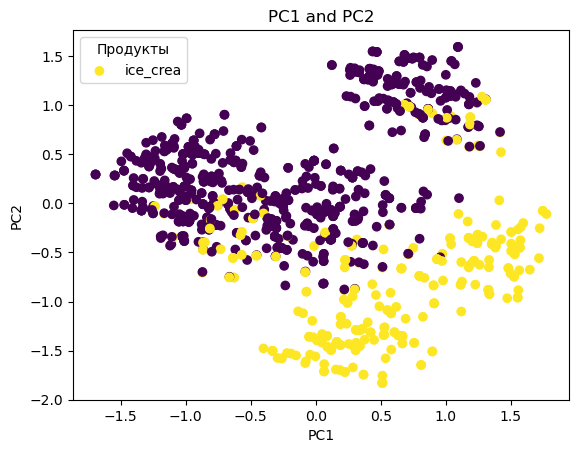

In [14]:
number_components = 2
pca = PCA(n_components= number_components)
fuaters = pca.fit_transform(transactions_one_hot) # делает из 3 приближенные матрицы для уменьшения размерности
scatter = plt.scatter(fuaters[:, 0], fuaters[:, 1], c= transactions_one_hot[PRODUCT_NAME], label= PRODUCT_NAME) # PRODUCT NAME содержит продукт моего задания
plt.title("PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
# Добавьте легенду
plt.legend(title="Продукты")

## Условие 9

С помощью метода tSNE нелинейную проекцию набора данных на
плоскость цветом укажите транзакции, содержащие продукт из вашего варианта. 

Не указанные в задании параметры (например, размер решетки для SOM или число слоев в
автоэнкодере можно выбирать на свое усмотрение для получение наиболее удобной
визуализации).

Дайте письменный комментарий, чем с вашей точки зрения для вашего
примера лучше или хуже нелинейная проекция).

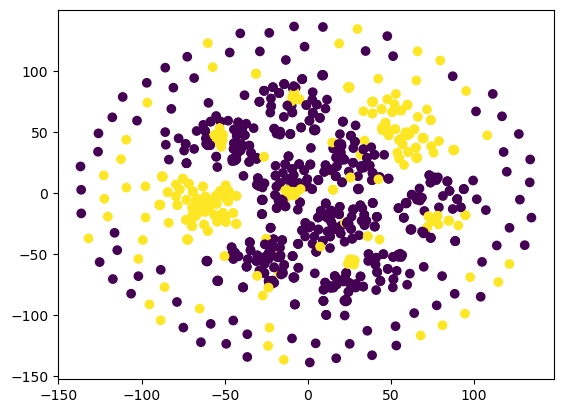

In [15]:
embedded = TSNE(n_components= 2,\
                learning_rate= 'auto',\
                init= 'random',\
                perplexity= 3).fit_transform(transactions_one_hot) # perplexity - определяет, сколько соседей учитываются в расчете условных вероятностей сходства. Большая перплексия приводит к усреднению вероятностей и созданию более глобальной структуры, в то время как маленькая перплексия подчеркивает локальную структуру.
scatter = plt.scatter(*embedded.T, c= transactions_one_hot[PRODUCT_NAME], label= PRODUCT_NAME)

plt.show()

tSNE лучше разбивает данные (появляется некоторое пространство между группами), т.к. он использует распределение Стьюдента в отличие от обычного  SNE. А Стьюдента хвостовая часть не такая узкая в отличие от нормального распределения.

Нелинейная проекция м.б. лучше, т.к. она может хорошо работать с нелинейными связями между признаков в отличие от PCA(которая счиатет линейной проекцией)

Также PCA чувствительнее к выбросам,но tSNE сложнее вычислительно.

## Условие 10
Из исходной матрицы (из пункта 7) отберите указанное число
независимых переменных с использованием VarClus6 метода.

In [16]:
clusters = VarClusHi(new_transactions, maxclus = 6)
clusters.varclus()

In [17]:
clusters.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,6,2.269452,0.993312,0.378242
1,1,2,1.569622,0.430378,0.784811
2,2,4,1.775050,0.903608,0.443763
3,3,5,1.747298,0.960767,0.349460
4,4,2,1.401720,0.598280,0.700860
5,5,1,1.000000,0.000000,1.000000


In [18]:
clusters.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,artichok,0.331882,0.073638,0.721228
1,0,avocado,0.542912,0.093912,0.504463
2,0,baguette,0.325976,0.059756,0.716861
3,0,olives,0.521717,0.110853,0.537912
4,0,turkey,0.269857,0.076499,0.790625
5,0,bourbon,0.277107,0.036053,0.749930
6,1,coke,0.784811,0.083987,0.234919
7,1,ice_crea,0.784811,0.080811,0.234108
8,2,apples,0.360347,0.076063,0.692313
9,2,corned_b,0.463746,0.075951,0.580331
